In [0]:
from google.colab import files
uploaded = files.upload()

Saving Weather Forecast Training.csv to Weather Forecast Training.csv


In [0]:
#importing necessary libraries
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['Weather Forecast Training.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


In [0]:
#following same preprocessing steps that i used for k means
newdf = df2.dropna( how='all')
newdf = df2.dropna( thresh=4)
newdf.interpolate(method='linear', axis=0,inplace = True)
newdf = newdf.dropna()
newdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
1,Nuriootpa,11.1,20.8,0.0,4.80,8.30,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,4.45,7.95,SE,44.0,SW,9.0,99.0,1028.5,5.5,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,4.10,7.60,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,3.75,7.25,NNE,41.0,ESE,7.0,40.0,1027.1,5.5,22.5,No,No
5,MelbourneAirport,6.6,16.3,8.4,3.40,6.90,S,50.0,S,30.0,55.0,1021.4,7.0,14.6,Yes,No


In [0]:
num_var2 = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed', 'Humidity', 'Pressure','Cloud','Temp']

In [0]:
df2 = newdf[num_var2]
df2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
1,11.1,20.8,0.0,4.80,8.30,39.0,26.0,48.0,1014.4,7.0,19.5
2,15.9,19.5,17.6,4.45,7.95,44.0,9.0,99.0,1028.5,5.5,17.8
3,0.0,14.9,0.0,4.10,7.60,35.0,19.0,55.0,1023.0,4.0,14.2
4,9.1,22.7,0.0,3.75,7.25,41.0,7.0,40.0,1027.1,5.5,22.5
5,6.6,16.3,8.4,3.40,6.90,50.0,30.0,55.0,1021.4,7.0,14.6


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

#scaling all the numerical features 
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df2)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = num_var2
df_normalized.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,47344.000000,47344.000000,47344.000000,47344.000000,47344.000000,47344.000000,47344.000000,47344.000000,47344.000000,47344.000000,47344.000000
mean,0.511450,0.522800,0.012951,0.067731,0.453083,0.274051,0.240614,0.565553,0.611273,0.645591,0.501605
std,0.166860,0.140685,0.039177,0.047657,0.242839,0.113727,0.123532,0.221157,0.117488,0.299439,0.138609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388601,0.416830,0.000000,0.036223,0.268966,0.187500,0.152778,0.414141,0.532125,0.375000,0.398020
50%,0.505181,0.510763,0.000000,0.059508,0.468966,0.250000,0.236111,0.575758,0.609555,0.750000,0.489109
75%,0.634715,0.624266,0.007902,0.087969,0.648276,0.335938,0.305556,0.727273,0.690280,0.875000,0.598020
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_normalized, 'ward')

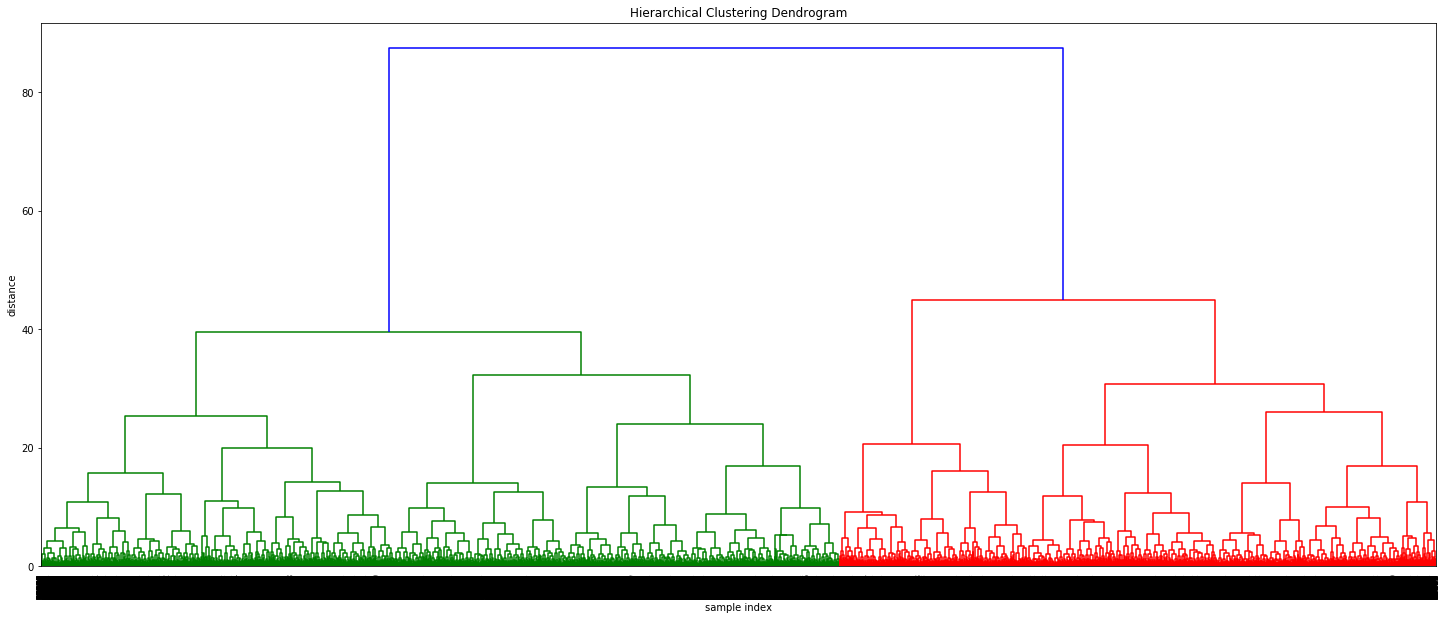

In [0]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [0]:
Z[-4:,2]


array([32.2321359 , 39.4872049 , 44.99080887, 87.38593494])

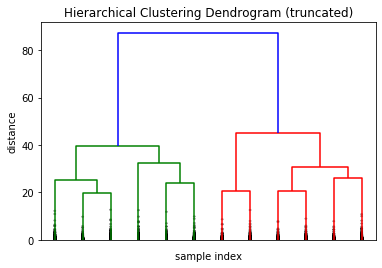

In [0]:
#truncating dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

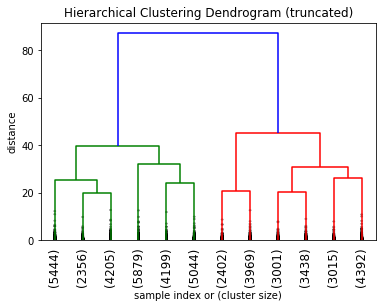

In [0]:

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

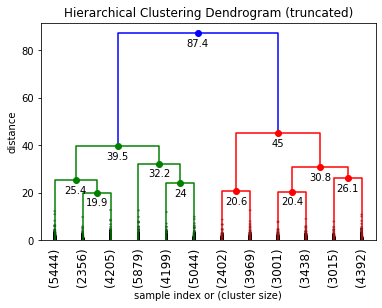

In [0]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

**Selecting a Distance Cut-Off Determining the Number of clusters**

In [0]:

# set cut-off to 50
max_d = 50  # max_d as in max_distance

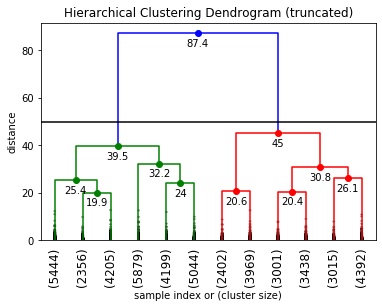

In [0]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

# Retrieve the Clusters

In [0]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)